## **BT thực hành 2.3.4: Giảm chiều dữ liệu iris.csv**
- Đọc tập tin **iris.csv** vào dataframe và chỉ lấy 4 cột đầu
- Áp dụng SVD và giảm chiều dữ liệu k = 2
- Trực quan hóa dữ liệu sau khi giảm chiều, có cả cột species


> Cập nhật: **07/2023**



In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)
folder = '/content/gdrive/My Drive/Edu/Chia se hoc lieu/LDS3/Bai tap HV/Ch2_Factorization'

Mounted at /content/gdrive


In [ ]:
## Thư viện
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Mở tập tin dữ liệu iris.csv
iris = pd.read_csv(folder + '/Data/iris.csv')

## Chỉ sử dụng 4 cột đầu tiên (cột 'species' là nhãn phân loại - target)
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [ ]:
## Áp dụng SVD
U, s, VT = np.linalg.svd(X)

In [ ]:
## Hiển thị kết quả
print('- Ma trận U', U.shape, ':\n', U)
print('\n- Singular values:', s)
print('\n- Ma trận VT', VT.shape, ':\n', VT)

- Ma trận U (150, 150) :
 [[-6.16171172e-02  1.29969428e-01 -5.58364155e-05 ... -9.34637342e-02
  -9.60224157e-02 -8.09922905e-02]
 [-5.80722977e-02  1.11371452e-01  6.84386629e-02 ...  3.66755322e-02
  -3.24463474e-02  1.27273399e-02]
 [-5.67633852e-02  1.18294769e-01  2.31062793e-03 ...  3.08252776e-02
   1.95234663e-01  1.35567696e-01]
 ...
 [-9.40702260e-02 -4.98348018e-02 -4.14958083e-02 ...  9.81822841e-01
  -2.17978813e-02 -8.85972146e-03]
 [-9.48993908e-02 -5.62107520e-02 -2.12386574e-01 ... -2.14264126e-02
   9.42038920e-01 -2.96933496e-02]
 [-8.84882764e-02 -5.16210172e-02 -9.51442925e-02 ... -8.52768485e-03
  -3.02139863e-02  9.73577349e-01]]

- Singular values: [95.95066751 17.72295328  3.46929666  1.87891236]

- Ma trận VT (4, 4) :
 [[-0.75116805 -0.37978837 -0.51315094 -0.16787934]
 [ 0.28583096  0.54488976 -0.70889874 -0.34475845]
 [ 0.49942378 -0.67502499 -0.05471983 -0.54029889]
 [ 0.32345496 -0.32124324 -0.48077482  0.74902286]]


In [ ]:
## Giảm ma trận S xuống còn 2 chiều (để biểu diễn trực quan bằng biểu đồ)
n_components = 2

Sigma = np.zeros(X.shape)
Sigma[:X.shape[1],:X.shape[1]] = np.diag(s)

Sigma = Sigma[:, :n_components]
print(Sigma[0:5])


[[95.95066751  0.        ]
 [ 0.         17.72295328]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


In [ ]:
## Giảm ma trận V.T xuống còn 2 chiều
VT = VT[:n_components, :]
VT

array([[-0.75116805, -0.37978837, -0.51315094, -0.16787934],
       [ 0.28583096,  0.54488976, -0.70889874, -0.34475845]])

In [ ]:
## Kiểm chứng: U @ S = A @ V (U = A @ V @ S-1)
U_S = U @ Sigma
print(U_S[0:5])

[[-5.91220352  2.30344211]
 [-5.57207573  1.97383104]
 [-5.4464847   2.09653267]
 [-5.43601924  1.87168085]
 [-5.87506555  2.32934799]]


In [ ]:
## Kiểm chứng: U @ S = A @ V
A_V = X @ VT.T
print(A_V[0:5].to_string(index = False))

## Ghép nối cột nhãn phân loại (target) 'species' vào A_V
A_V.columns = ["comp1", "comp2"]
A_V["species"] = iris['species']
A_V.head()

        0        1
-5.912204 2.303442
-5.572076 1.973831
-5.446485 2.096533
-5.436019 1.871681
-5.875066 2.329348


,comp1,comp2,species
0,-5.912204,2.303442,setosa
1,-5.572076,1.973831,setosa
2,-5.446485,2.096533,setosa
3,-5.436019,1.871681,setosa
4,-5.875066,2.329348,setosa


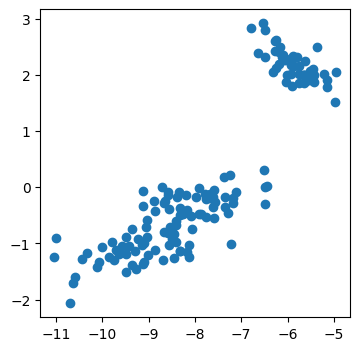

In [ ]:
## Biểu diễn trực quan dữ liệu GIẢM CHIỀU (2D) - KHÔNG phân loại
plt.figure(figsize = (4, 4))
plt.scatter(A_V["comp1"], A_V["comp2"])
plt.show()

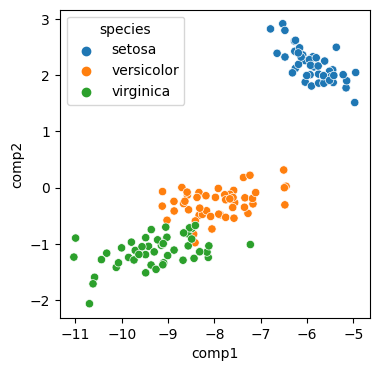

In [ ]:
## Biểu diễn trực quan dữ liệu GIẢM CHIỀU (2D) - CÓ phân loại
plt.figure(figsize = (4, 4))
sns.scatterplot(x = "comp1", y = "comp2", data = A_V, hue = "species")
plt.show()

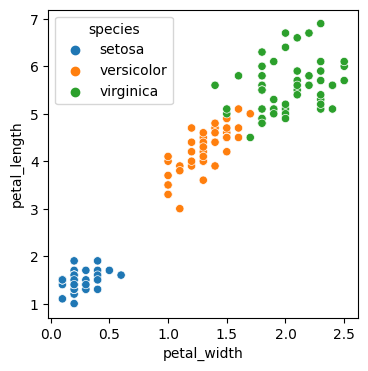

In [ ]:
## Biểu diễn trực quan dữ liệu GỐC với 'petal_width' và 'petal_length'
plt.figure(figsize = (4, 4))
sns.scatterplot(x = "petal_width", y = "petal_length", data = iris, hue = "species")
plt.show()

In [ ]:
## Áp dụng hàm TruncatedSVD()
from sklearn.decomposition import TruncatedSVD

## Giảm xuống 2 chiều
tsvd = TruncatedSVD(n_components = 2) # khai báo số chiều muốn giảm

## Thực hiện truncatedSVD (.fit())và chuyển tọa độ trong không gian mới (phép chiếu)
X_tsvd = tsvd.fit(X).transform(X)

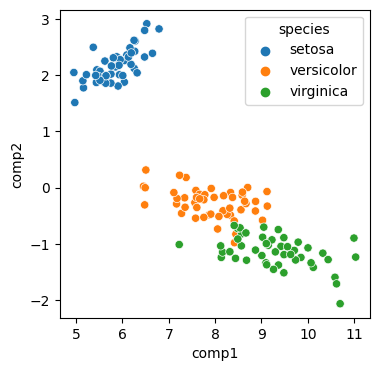

In [ ]:
## Biểu diễn trực quan dữ liệu
df = pd.DataFrame(X_tsvd, columns = ["comp1", "comp2"])
df["species"] = iris['species']
plt.figure(figsize = (4, 4))
sns.scatterplot(x = "comp1", y = "comp2", data = df, hue = "species")
plt.show();

In [ ]:
df_new = tsvd.fit(X)

print(df_new.components_)               # right singular vectors
print(df_new.explained_variance_)
print(df_new.explained_variance_ratio_) # percentage of variance explained by each of the selected components.
print(df_new.singular_values_)
print(df_new.n_features_in_)            # number of features seen during fit
print(df_new.feature_names_in_)         # names of features seen during fit

[[ 0.75116805  0.37978837  0.51315094  0.16787934]
 [ 0.28583096  0.54488976 -0.70889874 -0.34475845]]
[2.40685523 2.02821062]
[0.53028106 0.44685765]
[95.95066751 17.72295328]
4
['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
